written by 202101060209 计算机214 牟良威

信用卡消费已经成为当今重要的消费方式之一，但是利用信用卡进行找的非法事件时有发生，这增加了用户、银行及金融机构的风险，因此，通过交易订单的特征来预测其是否为诈骗交易是金融风控中的重要任务。

现有一个信用卡交易情况数据（data/Exam/creditcard.csv）:
其中包含了28个匿名特征(v1-v28)、1个时间特征（Time列中的数字代表字2013年9月1日0点以来的秒数）、一个交易金额特征（Amount）以及一个目标特征（Class为1代表诈骗交易）

In [25]:
import numpy as np
import pandas as pd
book = pd.read_csv('data/Exam/creditcard.csv')
book.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
book.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

请按照要求完成特征工程。

1.利用分箱技术对Amount特征进行变换，并利用One-Hote编码进行转化。（分箱个数自定）。（20分）

利用分箱技术对Amount特征进行变换：

In [27]:
book.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
#创建10000个箱子
bins=np.linspace(0,25691.16,10000)
print('bins:{}'.format(bins))

bins:[0.00000000e+00 2.56937294e+00 5.13874587e+00 ... 2.56860213e+04
 2.56885906e+04 2.56911600e+04]


In [29]:
#记录每个数据点所属于的箱子
X=book.Amount.values
which_bins=np.digitize(X,bins=bins)

print('\nData Point:\n',X)
print('\nBin membership for data points:\n',which_bins)


Data Point:
 [149.62   2.69 378.66 ...  67.88  10.   217.  ]

Bin membership for data points:
 [ 59   2 148 ...  27   4  85]


In [30]:
book['Amount_bins']=which_bins #增加一个列
book.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_bins
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,59
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,148
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,49
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,28


这里将Amount特征变量变换为一个分类特征，用于表示数据点所在的箱子。
接下来进一步将分类特征转化为one-hot编码。

利用One-Hote编码进行转化：

In [31]:
pd.get_dummies(book.Amount_bins).head()

,1,2,3,4,5,6,7,8,9,10,...,3420,3422,3893,3970,4589,4631,5025,7360,7651,10000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


以上第一题便完成了

2.自主学习时序特征提取方法，并详细描述如何从时序特征中提取特征。（20分）

时间序列特征构造

时间序列不仅包含一维时间变量，还有一维其他变量，如股票价格、天气温度、降雨量、订单量等。时间序列分析的主要目的是基于历史数据来预测未来信息。对于时间序列，我们关心的是长期的变动趋势、周期性的变动（如季节性变动）以及不规则的变动。

按固定时间长度把时间序列划分成多个时间窗，然后构造每个时间窗的特征。

1.时间序列聚合特征

按固定时间长度把时间序列划分成多个时间窗，然后使用聚合操作构造每个时间窗的特征。

1）平均值

例子：历史销售量平均值、最近N天销售量平均值。

2）最小值

例子：历史销售量最小值、最近N天销售量最小值。

3）最大值

例子：历史销售量最大值、最近N天销售量最大值。

4）扩散值

分布的扩散性，如标准差、平均绝对偏差或四分位差，可以反映测量的整体变化趋势。

5）离散系数值

离散系数是策略数据离散程度的相对统计量，主要用于比较不同样本数据的离散程度。

6）分布性

时间序列测量的边缘分布的高阶特效估计(如偏态系数或峰态系数)，或者更进一步对命名分布进行统计测试(如标准或统一性)，在某些情况下比较有预测力。

2.时间序列历史特征

1）前一（或n）个窗口的取值

例子：昨天、前天和3天前的销售量。

2）周期性时间序列前一（或n）周期的前一（或n）个窗口的取值

例子：写字楼楼下的快餐店的销售量一般具有周期性，周期长度为7天，7天前和14天前的销售量。

3.时间序列复合特征

1）趋势特征

趋势特征可以刻画时间序列的变化趋势。

例子：每个用户每天对某个Item行为次数的时间序列中，User一天对Item的行为次数/User三天对Item的行为次数的均值，表示短期User对Item的热度趋势，大于1表示活跃逐渐在提高；三天User对Item的行为次数的均值/七天User对Item的行为次数的均值表示中期User对Item的活跃度的变化情况；七天User对Item的行为次数的均值/ 两周User对Item的行为次数的均值表示“长期”（相对）User对Item的活跃度的变化情况。

2）窗口差异值特征

一个窗口到下一个窗口的差异。例子：商店销售量时间序列中，昨天的销售量与前天销售量的差值。

3）自相关性特征

原时间序列与自身左移一个时间空格（没有重叠的部分被移除）的时间序列相关联

除了上面描述的特征外，时间序列还有历史波动率、瞬间波动率、隐含波动率、偏度、峰度、瞬时相关性等特征。

3.将Time列还原为时间戳序列，根据所学到的时序特征提取方法，从Time列构造不少于5个时间序列特征。（20分）

将Time列还原为时间戳序列

In [32]:
times = book.Time.tolist()
old_times = times.copy()
times = [pd.Timestamp(i,unit='s') for i in times]
book['Time']=times
book['old'] = old_times
book.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_bins,old
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,59,0.0
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2,0.0
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,148,1.0
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,49,1.0
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,28,2.0


构造时间序列特征

首先要按固定时间长度把时间序列划分成多个时间窗

In [33]:
book.old.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: old, dtype: float64

In [34]:
#创建10000个时间窗
bins=np.linspace(0.000000,172792.000000,10000)
print('bins:{}'.format(bins))

bins:[0.00000000e+00 1.72809281e+01 3.45618562e+01 ... 1.72757438e+05
 1.72774719e+05 1.72792000e+05]


In [35]:
#记录每个时间戳所属于的时间窗
X=book.old.values
which_bins=np.digitize(X,bins=bins)
book['windows']=which_bins #增加一个列
book.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Amount_bins,old,windows
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,59,0.0,1
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2,0.0,1
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,148,1.0,1
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,49,1.0,1
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,28,2.0,1


以下以平均值进行示例，借6个匿名特征(v1-v6)进行相应的时间序列平均值特征构造

In [36]:
all_columns = book.columns.values.tolist()[1:7]
all_time = book.windows.unique().tolist()
muti = book['windows'].value_counts(sort=False)

In [37]:
new_columns = ['avg_time_'+i for i in all_columns]
for i in range(6) :
    listk=[]
    for j in all_time:
        get = book[book.windows==j][all_columns[i]].mean()
        for k in range(muti[j]):
            listk.append(get);
    book[new_columns[i]]=listk;


In [38]:
book.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount_bins,old,windows,avg_time_V1,avg_time_V2,avg_time_V3,avg_time_V4,avg_time_V5,avg_time_V6
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,59,0.0,1,-0.259066,-0.210893,0.938715,0.268386,0.14263,0.516033
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,2,0.0,1,-0.259066,-0.210893,0.938715,0.268386,0.14263,0.516033
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,148,1.0,1,-0.259066,-0.210893,0.938715,0.268386,0.14263,0.516033
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,49,1.0,1,-0.259066,-0.210893,0.938715,0.268386,0.14263,0.516033
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,28,2.0,1,-0.259066,-0.210893,0.938715,0.268386,0.14263,0.516033


以上便完成了6个新的时间序列特征的构造

4.对所有的变量进行特征降维，并描述所采用的降维方法的基本原理。（20分）

对所有的变量进行特征降维

这里我采用主成分分析(PCA)的方法对该题的所有特征变量进行特征降维，将其降维为5维：

In [39]:
from sklearn.decomposition import PCA
new_book = book.drop(columns=['old','windows','Class'])
pca=PCA(n_components=5)
new_f=pca.fit_transform(new_book[new_book.columns[1:]])
print(new_f.shape)
print(pca.explained_variance_ratio_)
print("降维结果为：\n", new_f)

(284807, 5)
[9.99578886e-01 5.24470300e-05 3.55253516e-05 3.26552397e-05
 2.78502516e-05]
降维结果为：
 [[ 6.58499916e+01  1.50756273e+00 -2.54119203e+00  1.17716640e+00
   1.05857216e+00]
 [-9.17518363e+01 -9.27344843e-01 -5.13701913e-01  5.53641744e-01
   4.43394926e-01]
 [ 3.11578977e+02  9.90621368e-01 -2.34446281e+00  7.15868632e-01
   5.14359876e-02]
 ...
 [-2.19324768e+01 -2.06074404e+00  3.04123342e+00 -1.73390779e+00
   2.37965942e-01]
 [-8.42132005e+01  4.72401592e-01 -1.21494159e-01  5.75598914e-01
   5.70156730e-01]
 [ 1.38072731e+02  4.30946706e-01 -6.17650777e-01  2.66919674e-01
  -6.41879816e-01]]


降维原理解释：

PCA：即高维数据转化为低维数据的过程，在此过程中可能会舍弃原有数据、创造新的变量。

降维的概念即将高维数据转化为低维数据，是一种数据维数压缩，要尽可能降低原数据的维数（复杂度），损失少量信息。

就比如对于一系列的平面上点，我们对其表示为（-1，-2），（-1，0），（0，0），（2，1），（0，1）

我们要对其进行降维表示便可以先去求用线性回归拟合出一条直线，再基于那条直线进行表示，那么数据就从二维降低到一维，也就是从面到了点

那么对于更高维度的正交属性空间中的样本点，我们就要用一个超平面（直线的高维推广）对所有样本进行恰当的表达

且这个超平面要有以下性质：

最近重构性：样本点到这个超平面的距离足够近

最大可分性：样本点在这个超平面上的投影能尽可能的分开

基于这种思想就能将高维数据一步一步地降维。

PCA作为一个非监督学习的降维方法，它只需要特征值分解，就可以对数据进行压缩，去噪，PCA是为了让映射后的样本具有最大的发散性,所以说PCA是一种无监督的降维方法。


其在python中其使用方法为：

sklearn.decomposition.PCA(n_components=None)

将数据分解为较低维数空间

n_components:

小数：表示保留百分之多少的信息

整数：减少到多少特征

PCA.fit_transform(X) 

X : numpy array格式的数据[n_samples,n_features]

返回值：转换后指定维度的array





5.选择一种所学的特征选择方法，从降维后的特征中提取特征，并详细描述该特征选择方法的基本原理。（20分）

这里我选择的特征选择方法是方差选择法：

In [40]:
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import f_regression 
X=new_f.tolist()
y=book['Class'].tolist()
print(X[:5],'\n')
print(y[:5],'\n')
#计算每个变量与目标变量的相关系数，回归其F值。逗号后为筛选后保留特征值的比例（例如下面代码中保留50%）
#使用SelectPercentile
sel=SelectPercentile(score_func=f_regression,percentile=50) # 50%的特征被选出来
sel.fit(X,y)
X_sel=sel.transform(X)
print(X_sel,'\n')
print(X_sel.shape,'\n')

[[65.8499915846844, 1.5075627292066824, -2.541192025535735, 1.1771664017942973, 1.0585721636152885], [-91.7518362830644, -0.9273448434884266, -0.5137019126495087, 0.5536417438335697, 0.44339492587180346], [311.57897712072287, 0.9906213678931106, -2.34446280994311, 0.715868632496121, 0.051435987576947534], [37.88186689746453, 1.0647632654167234, -1.7807917034393008, 0.4678080184958946, -1.0256779883216902], [-19.60292848545217, 1.4446772518775397, -1.2037988359037157, 1.335946285900903, 0.10272504752225183]] 

[0, 0, 0, 0, 0] 

[[-2.54119203  1.05857216]
 [-0.51370191  0.44339493]
 [-2.34446281  0.05143599]
 ...
 [ 3.04123342  0.23796594]
 [-0.12149416  0.57015673]
 [-0.61765078 -0.64187982]] 

(284807, 2) 



[False False  True False  True]


Text(0.5, 0, 'Sample index')

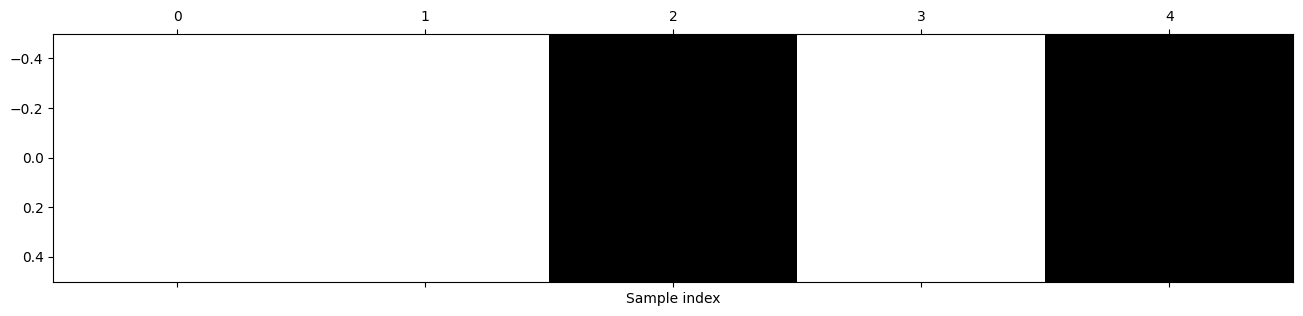

In [41]:
#查看哪些特征被选出来了
import matplotlib.pyplot as plt
mask=sel.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')

方差选择法的基本原理：

方差选择法是基于特征的相关系数的f值对特征进行选择，属于一种f检验。

F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。

相关系数的计算公式是用xy的协方差除以x的标准差和y的标准差之积：

![jupyter](https://img-blog.csdnimg.cn/74527edd6e75462bbfc0ab214ba6b15d.png)

f值的计算公式为：

![jupyter](https://img-blog.csdnimg.cn/a6e7e8ec2d634075bf3594c1ada0d55e.png)

written by 202101060209 计算机214 牟良威